In [52]:
import numpy as np
import matplotlib.pyplot as plt

#1. 

#############qr clgs###################
def qr_clgs(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j - 1):
            q = Q[:, i]
            R[i, j] = q.dot(v)
            v = v - R[i, j] * q

        norm = np.linalg.norm(v)
        Q[:, j] = v / norm
        R[j, j] = norm
    return Q, R
################################################

In [53]:
#############qr mgs#######################
def qr_mgs(A):
    m, n = A.shape
    Q = np.copy(A)
    Q = Q.astype(np.float)
    R = np.zeros((n, n))
    for i in range(n):
        R[i, i] = np.linalg.norm(Q[:, i])
        Q[:, i] = Q[:, i] / R[i, i]
        R[i, i + 1:n] = np.matmul(np.transpose(Q[:, i]), Q[:, i + 1:n])
        Q[:, i + 1:n] = Q[:, i + 1:n] - np.matmul(np.expand_dims(Q[:, i], axis=1),
                                                  np.expand_dims(R[i, i + 1:n], axis=0))

    R[n - 1, n - 1] = np.linalg.norm(Q[:, n - 1])

    if (R[n - 1, n - 1] != 0):
        Q[:, n - 1] = Q[:, n - 1] / R[n - 1, n - 1]

    return Q, R
################################################

In [54]:
#############qr house##########################

def qr_h(A):
    m, n = A.shape
    Q = np.eye(m)
    for i in range(n - (m == n)):
        H = np.eye(m)
        H[i:, i:] = formQ(A[i:, i])
        Q = np.dot(Q, H)
        A = np.dot(H, A)
    return Q, A

def formQ(a):
    v = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    v[0] = 1
    H = np.eye(a.shape[0])
    H = H - (2 / np.dot(v, v)) * np.dot(v[:, None], v[None, :])
    return H
##############################################################

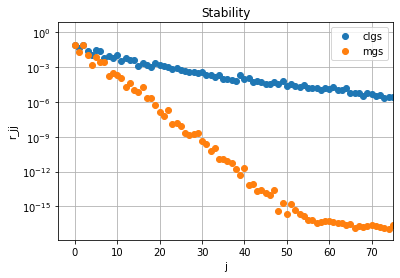

In [55]:
# 1-1
B = np.random.randn(80, 80)

U, X = np.linalg.qr(B)
V, X = np.linalg.qr(B)

S = np.zeros((80, 80))

def diag_two(S):
    for i in range(80):
        S[i, i] = 2 ** (-i - 1)
    return S

temp = np.matmul(U, diag_two(S))

A = np.matmul(temp, V)

Qc, Rc = qr_clgs(A)
Qm, Rm = qr_mgs(A)

plt.semilogy(np.diag(Rc), 'o', label = 'clgs')
plt.semilogy(np.diag(Rm), 'o', label = 'mgs')
plt.title('Stability')
plt.xlabel('j')
plt.ylabel('r_jj')
plt.xlim(right = 75)
plt.grid()
plt.legend()
plt.show()

In [56]:
#1-2
A = np.array([[0.70000, 0.70711], [0.70001, 0.70711]])

Qm, Rm = qr_mgs(A)

V, R = qr_h(A)

Q = formQ(V)

Q_1 = np.linalg.norm(np.matmul(np.transpose(Q), Q) - np.eye(2))

Q_2 = np.linalg.norm(np.matmul(np.transpose(Qm), Qm) - np.eye(2))

print(Q_1)
print(Q_2)

#householder is more stable

64.77237431320397
3.254726094493924e-11


In [57]:
#2
def givens(A):
    m, n = A.shape
    IndexI = np.zeros((m, n))
    IndexJ = np.zeros((m, n))
    C = np.zeros((m, n))
    S = np.zeros((m, n))
    Q = np.eye(m)

    for i in range(n):
        for j in range(i + 1, m):
            c = A[i][i] / ((A[i][i]) ** 2 + (A[j][i]) ** 2) ** 0.5
            s = A[j][i] / ((A[i][i]) ** 2 + (A[j][i]) ** 2) ** 0.5

            tmp = c * A[i][:] + s * A[j][:]
            A[j][:] = -s * A[i][:] + c * A[j][:]
            A[i][:] = tmp

            IndexI[j][i] = i
            IndexJ[j][i] = j
            C[j][i] = c
            S[j][i] = s

            Q[:][i] = c * Q[:][i] + s * Q[:][j]
            Q[:][j] = -s * Q[:][i] + c * Q[:][j]

    R = A

    return [Q, R]

A = np.random.randint(10 , size = (4, 4))

print(givens(A))

[array([[ 0.67842718,  0.0753808 ,  0.37922342,  0.62469505],
       [-0.42193177, -0.04688131,  0.63830822,  0.        ],
       [-0.47762694, -0.05306966,  0.59839032,  0.0552427 ],
       [ 0.48709724,  0.05412192,  0.14989287, -0.39451143]]), array([[12,  1, 12,  6],
       [ 0,  2,  4,  1],
       [ 0,  0,  7,  1],
       [ 0,  0,  0, -1]])]


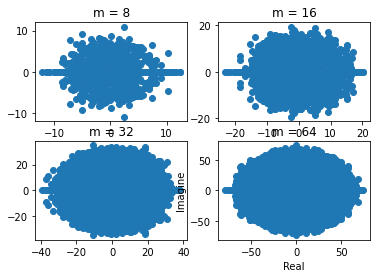

In [58]:
#3-a

import numpy as np
import matplotlib.pyplot as plt

m1 = 8
m2 = 16
m3 = 32
m4 = 64

A1 = np.zeros((100, m1, m1))
A2 = np.zeros((100, m2, m2))
A3 = np.zeros((100, m3, m3))
A4 = np.zeros((100, m4, m4))

for i in range(100):
    A1[i] = np.random.normal(0, np.sqrt(m1), size = (m1, m1))
    A2[i] = np.random.normal(0, np.sqrt(m2), size=(m2, m2))
    A3[i] = np.random.normal(0, np.sqrt(m3), size=(m3, m3))
    A4[i] = np.random.normal(0, np.sqrt(m4), size=(m4, m4))

eigenvalues1 = np.array([np.linalg.eigvals(A1[k]) for k in range(100)])
eigenvalues2 = np.array([np.linalg.eigvals(A2[k]) for k in range(100)])
eigenvalues3 = np.array([np.linalg.eigvals(A3[k]) for k in range(100)])
eigenvalues4 = np.array([np.linalg.eigvals(A4[k]) for k in range(100)])

plt.subplot(221)
plt.scatter(np.real(eigenvalues1), np.imag(eigenvalues1))
plt.title('m = 8')
plt.subplot(222)
plt.scatter(np.real(eigenvalues2), np.imag(eigenvalues2))
plt.title('m = 16')
plt.subplot(223)
plt.scatter(np.real(eigenvalues3), np.imag(eigenvalues3))
plt.title('m = 32')
plt.subplot(224)
plt.scatter(np.real(eigenvalues4), np.imag(eigenvalues4))
plt.title('m = 64')
plt.xlabel('Real')
plt.ylabel('Imagine')
plt.show()

# m이 커짐에 따라 점점 더 원의 모양에 수렴한다.
# radius도 m이 커짐에 따라 점점 m에 수렴한다.

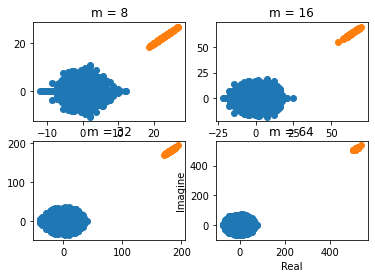

In [59]:
#3-2

m1 = 8
m2 = 16
m3 = 32
m4 = 64

A1 = np.zeros((100, m1, m1))
A2 = np.zeros((100, m2, m2))
A3 = np.zeros((100, m3, m3))
A4 = np.zeros((100, m4, m4))

for i in range(100):
    A1[i] = np.random.normal(0, np.sqrt(m1), size = (m1, m1))
    A2[i] = np.random.normal(0, np.sqrt(m2), size=(m2, m2))
    A3[i] = np.random.normal(0, np.sqrt(m3), size=(m3, m3))
    A4[i] = np.random.normal(0, np.sqrt(m4), size=(m4, m4))

eigenvalues1 = np.array([np.linalg.eigvals(A1[k]) for k in range(100)])
eigenvalues2 = np.array([np.linalg.eigvals(A2[k]) for k in range(100)])
eigenvalues3 = np.array([np.linalg.eigvals(A3[k]) for k in range(100)])
eigenvalues4 = np.array([np.linalg.eigvals(A4[k]) for k in range(100)])

norm1 = np.array([np.linalg.norm(A1[k]) for k in range(100)])
norm2 = np.array([np.linalg.norm(A2[k]) for k in range(100)])
norm3 = np.array([np.linalg.norm(A3[k]) for k in range(100)])
norm4 = np.array([np.linalg.norm(A4[k]) for k in range(100)])


plt.subplot(221)
plt.scatter(np.real(eigenvalues1), np.imag(eigenvalues1))
plt.scatter(norm1, norm1)
plt.title('m = 8')
plt.subplot(222)
plt.scatter(np.real(eigenvalues2), np.imag(eigenvalues2))
plt.scatter(norm2, norm2)
plt.title('m = 16')
plt.subplot(223)
plt.scatter(np.real(eigenvalues3), np.imag(eigenvalues3))
plt.scatter(norm3, norm3)
plt.title('m = 32')
plt.subplot(224)
plt.scatter(np.real(eigenvalues4), np.imag(eigenvalues4))
plt.scatter(norm4, norm4)
plt.title('m = 64')
plt.xlabel('Real')
plt.ylabel('Imagine')
plt.show()

# 항상 norm 값이 더 크다
# m이 커질 수록 equality에서 더 멀어진다

0.38
0.2
0.07


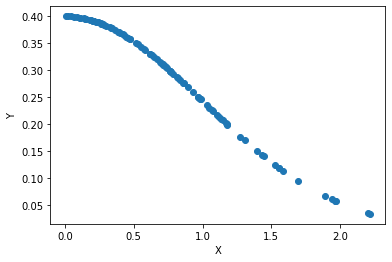

In [60]:
#3-c
from scipy import stats
from scipy.linalg import svdvals

m1 = 16

A1 = np.zeros((100, m1, m1))

for i in range(100):
    A1[i] = np.random.normal(0, np.sqrt(m1), size=(m1, m1))

sigvals1 = np.array([min(svdvals(A1[k])) for k in range(100)])

a1 = sigvals1[sigvals1 < 0.5]
a2 = sigvals1[sigvals1 < 0.25]
a3 = sigvals1[sigvals1 < 0.125]
print(len(a1)/100)
print(len(a2)/100)
print(len(a3)/100)

#sigval이 2^-n 보다 작을 확률은 2^-n 그 값 그대로에 수렴한다. m이 변해도 동일하다.

plt.scatter(sigvals1, stats.norm.pdf(sigvals1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#확률 분포를 보면 0에 가까운 값에 더 많이 밀집해있다. m값이 달라져도 이는 마찬가지이다.

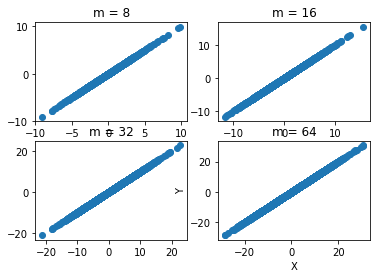

In [61]:
#3-d-a
m1 = 8
m2 = 16
m3 = 32
m4 = 64

A1 = np.zeros((100, m1, m1))
A2 = np.zeros((100, m2, m2))
A3 = np.zeros((100, m3, m3))
A4 = np.zeros((100, m4, m4))

for i in range(100):
    A1[i] = np.random.normal(0, np.sqrt(m1), size=(m1, m1))
    A2[i] = np.random.normal(0, np.sqrt(m2), size=(m2, m2))
    A3[i] = np.random.normal(0, np.sqrt(m3), size=(m3, m3))
    A4[i] = np.random.normal(0, np.sqrt(m4), size=(m4, m4))

for i in range(100):
    for j in range(m1):
        for k in range(m1):
            if j < k:
                A1[i][j][k] = 0

for i in range(100):
    for j in range(m2):
        for k in range(m2):
            if j < k:
                A2[i][j][k] = 0

for i in range(100):
    for j in range(m3):
        for k in range(m3):
            if j < k:
                A3[i][j][k] = 0

for i in range(100):
    for j in range(m4):
        for k in range(m4):
            if j < k:
                A4[i][j][k] = 0

eigenvalues1 = np.array([np.linalg.eigvals(A1[k]) for k in range(100)])
eigenvalues2 = np.array([np.linalg.eigvals(A2[k]) for k in range(100)])
eigenvalues3 = np.array([np.linalg.eigvals(A3[k]) for k in range(100)])
eigenvalues4 = np.array([np.linalg.eigvals(A4[k]) for k in range(100)])

plt.subplot(221)
plt.scatter(eigenvalues1, eigenvalues1)
plt.title('m = 8')
plt.subplot(222)
plt.scatter(eigenvalues2, eigenvalues2)
plt.title('m = 16')
plt.subplot(223)
plt.scatter(eigenvalues3, eigenvalues3)
plt.title('m = 32')
plt.subplot(224)
plt.scatter(eigenvalues4, eigenvalues4)
plt.title('m = 64')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
## 원이 아닌 일직선 모양으로 표현되며 max와 min이 m에 수렴한다.
## lower, upper 동일

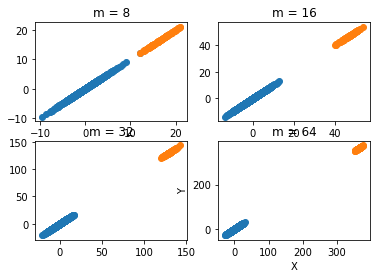

In [62]:
#3-d-b

m1 = 8
m2 = 16
m3 = 32
m4 = 64

A1 = np.zeros((100, m1, m1))
A2 = np.zeros((100, m2, m2))
A3 = np.zeros((100, m3, m3))
A4 = np.zeros((100, m4, m4))

for i in range(100):
    A1[i] = np.random.normal(0, np.sqrt(m1), size=(m1, m1))
    A2[i] = np.random.normal(0, np.sqrt(m2), size=(m2, m2))
    A3[i] = np.random.normal(0, np.sqrt(m3), size=(m3, m3))
    A4[i] = np.random.normal(0, np.sqrt(m4), size=(m4, m4))

for i in range(100):
    for j in range(m1):
        for k in range(m1):
            if j < k:
                A1[i][j][k] = 0

for i in range(100):
    for j in range(m2):
        for k in range(m2):
            if j < k:
                A2[i][j][k] = 0

for i in range(100):
    for j in range(m3):
        for k in range(m3):
            if j < k:
                A3[i][j][k] = 0

for i in range(100):
    for j in range(m4):
        for k in range(m4):
            if j < k:
                A4[i][j][k] = 0

eigenvalues1 = np.array([np.linalg.eigvals(A1[k]) for k in range(100)])
eigenvalues2 = np.array([np.linalg.eigvals(A2[k]) for k in range(100)])
eigenvalues3 = np.array([np.linalg.eigvals(A3[k]) for k in range(100)])
eigenvalues4 = np.array([np.linalg.eigvals(A4[k]) for k in range(100)])

norm1 = np.array([np.linalg.norm(A1[k]) for k in range(100)])
norm2 = np.array([np.linalg.norm(A2[k]) for k in range(100)])
norm3 = np.array([np.linalg.norm(A3[k]) for k in range(100)])
norm4 = np.array([np.linalg.norm(A4[k]) for k in range(100)])

plt.subplot(221)
plt.scatter(eigenvalues1, eigenvalues1)
plt.scatter(norm1, norm1)
plt.title('m = 8')
plt.subplot(222)
plt.scatter(eigenvalues2, eigenvalues2)
plt.scatter(norm2, norm2)
plt.title('m = 16')
plt.subplot(223)
plt.scatter(eigenvalues3, eigenvalues3)
plt.scatter(norm3, norm3)
plt.title('m = 32')
plt.subplot(224)
plt.scatter(eigenvalues4, eigenvalues4)
plt.scatter(norm4, norm4)
plt.title('m = 64')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
## m이 커질수록 점점 더 norm 값들의 분포와 멀어진다.
## lower, upper 동일

0.99
0.98
0.93


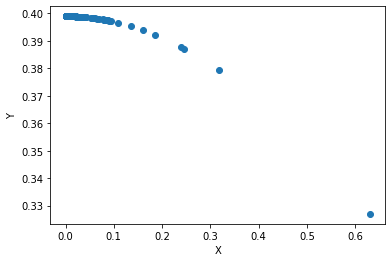

In [63]:
#3-d-c
from scipy import stats
from scipy.linalg import svdvals

m1 = 8

A1 = np.zeros((100, m1, m1))

for i in range(100):
    A1[i] = np.random.normal(0, np.sqrt(m1), size=(m1, m1))

for i in range(100):
    for j in range(m1):
        for k in range(m1):
            if j < k:
                A1[i][j][k] = 0

sigvals1 = np.array([min(svdvals(A1[k])) for k in range(100)])

a1 = sigvals1[sigvals1 < 0.5]
a2 = sigvals1[sigvals1 < 0.25]
a3 = sigvals1[sigvals1 < 0.125]
print(len(a1)/100)
print(len(a2)/100)
print(len(a3)/100)

#sigval이 2^-n 보다 작을 확률은 m이 커질 수록 1에 수렴한다.

plt.scatter(sigvals1, stats.norm.pdf(sigvals1))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##lower, upper 동일

In [64]:
#4
import numpy as np

m = 50
n = 12

t = np.random.rand(m)

B = np.vander(t, n)

b = np.zeros((m, 1))

for i in range(m):
    b[i] = np.cos(4*t[i])

A = np.fliplr(B)

#a
x_1 = np.linalg.lstsq(A, b, rcond=None)[0]

print("a:", x_1)

#b

Q_2, R_2 = qr_mgs(A)
Qb_2 = np.matmul(np.transpose(Q_2), b)
x_2 = np.linalg.lstsq(R_2, Qb_2, rcond=None)[0]

print("b:", x_2)

#c

Q_3, R_3 = qr_h(A)
Qb_3 = np.matmul(np.transpose(Q_3), b)
x_3 = np.linalg.lstsq(R_3, Qb_3, rcond=None)[0]

print("c:", x_3)

#d
Q_4, R_4 = np.linalg.qr(A)
Qb_4 = np.matmul(np.transpose(Q_4), b)
x_4 = np.linalg.lstsq(R_4, Qb_4, rcond=None)[0]

print("d:", x_4)

#e 의도하신바를 모르겠습니다.

#f
u, s, v = np.linalg.svd(A)
c = np.dot(np.transpose(u), b)
s_inv = np.zeros((n, m))
s_inv[:n, :n] = np.diag(1/s)
w = np.dot(s_inv, c)
x_6 = np.matmul(np.transpose(v), w)

print("f:", x_6)

#normal equation이 instability를 보입니다.

a: [[ 1.00000002e+00]
 [-1.33268853e-06]
 [-7.99996162e+00]
 [-5.30086854e-04]
 [ 1.06707618e+01]
 [-1.91263820e-02]
 [-5.63317349e+00]
 [-9.95277512e-02]
 [ 1.72131209e+00]
 [-1.39487466e-02]
 [-3.66016615e-01]
 [ 8.65684729e-02]]
b: [[ 1.00000046e+00]
 [-3.55368645e-05]
 [-7.99908067e+00]
 [-1.12770414e-02]
 [ 1.07441701e+01]
 [-3.26124179e-01]
 [-4.80867146e+00]
 [-1.54972312e+00]
 [ 3.38227046e+00]
 [-1.20682427e+00]
 [ 1.21651474e-01]
 [ 1.22786259e-07]]
c: [[ 1.00000002e+00]
 [-1.33268758e-06]
 [-7.99996162e+00]
 [-5.30086604e-04]
 [ 1.06707618e+01]
 [-1.91263755e-02]
 [-5.63317351e+00]
 [-9.95277215e-02]
 [ 1.72131206e+00]
 [-1.39487224e-02]
 [-3.66016625e-01]
 [ 8.65684747e-02]]
d: [[ 1.00000002e+00]
 [-1.33268862e-06]
 [-7.99996162e+00]
 [-5.30086862e-04]
 [ 1.06707618e+01]
 [-1.91263820e-02]
 [-5.63317350e+00]
 [-9.95277504e-02]
 [ 1.72131209e+00]
 [-1.39487456e-02]
 [-3.66016615e-01]
 [ 8.65684730e-02]]
f: [[ 1.00000002e+00]
 [-1.33268862e-06]
 [-7.99996162e+00]
 [-5.3008686